<a href="https://colab.research.google.com/github/jiin124/Introduction-to-NLP-using-deep-learning/blob/main/RNN_torch%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬으로 RNN 구현하기

의사코드


```
hidden_state_t=0#초기 은닉상태를 0으로 초기화
for input_t in input_length:
  #각 시점마다 입력을 받는다. 
  output_t=tanh(input_t,hidden_state_t)#각시점에 대해서 입력과 은닉상태를 가지고 연산
  hidden_state_t=output_t#계산결과는 현재 시점의 은닉상태가 된다. 
```



In [1]:
import numpy as np

timesteps=10#시점의 수, NLP에서는 보통 문장의 길이가 된다. 
input_size=4#입력의 차원, NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size=8#은닉상태의 크기, 메모리셀의 용량이다.

inputs=np.random.random((timesteps,input_size))#입력에 해단되는 2D 텐서

hidden_state_t=np.zeros((hidden_size,))#초기 은닉상태는 0으로 초기화

In [2]:
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
Wx=np.random.random((hidden_size,input_size))#입력에 대한 가중치
Wh=np.random.random((hidden_size,hidden_size))#은닉상태에 대한 가중치

b=np.random.random((hidden_size,))#편향

In [4]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


. Wx는 (은닉 상태의 크기 × 입력의 차원), Wh는 (은닉 상태의 크기 × 은닉 상태의 크기), b는 (은닉 상태의 크기)의 크기를 가집니다.

In [5]:
total_hidden_states=[]

for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t=np.tanh(np.dot(Wx,input_t)+np.dot(Wh,hidden_state_t)+b)# Wx * Xt + Wh * Ht-1 + b(bias)

  total_hidden_states.append(list(output_t))# 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t=output_t

total_hidden_states=np.stack(total_hidden_states,axis=0)
# 출력 시 값을 깔끔하게 해준다.
print(total_hidden_states)
# (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.93017991 0.78437601 0.97660379 0.89874421 0.91869355 0.89362891
  0.9112964  0.94711238]
 [0.99991184 0.99999343 0.99999622 0.99991911 0.99975572 0.99997703
  0.99962765 0.99966135]
 [0.99992185 0.99999867 0.99999869 0.99995654 0.99993473 0.99999232
  0.99993231 0.99984824]
 [0.99997517 0.99999875 0.99999963 0.99998177 0.99997027 0.99999373
  0.9999653  0.99993557]
 [0.99977881 0.99999777 0.99999786 0.999875   0.99987525 0.99998495
  0.99989422 0.9997045 ]
 [0.999899   0.99999891 0.99999887 0.99995578 0.99994892 0.99999413
  0.99995736 0.99985544]
 [0.99997588 0.99999909 0.99999956 0.99998838 0.99997033 0.99999659
  0.99996901 0.99992885]
 [0.99992705 0.99999828 0.9999993  0.99994064 0.99995277 0.99998761
  0.99995139 0.99989101]
 [0.99997156 0.9999984  0.9999994  0.99997995 0.99994654 0.99999268
  0.99993317 0.99990007]
 [0.99997761 0.99999885 0.99999964 0.99998773 0.99996803 0.99999574
  0.99996631 0.99992868]

# 파이토치의 RNN

In [6]:
import torch
import torch.nn as nn

In [8]:
input_size=5#입력의 크기
hidden_size=8#은닉상태의 크기

In [9]:
#입력 텐서 정의
inputs=torch.Tensor(1,10,5)#(batchsize,time_steps,input_size)배치크기, 시점의수, 매시점마다 들어가는 입력


In [10]:
#RNN셀 만들기
#입력의 크기, 은닉상태의 크기를 정의해주고 
#batch_first=True를 통해 입력 텐서의 첫번재 차원이 배치 크기임을 알려준다. 
cell=nn.RNN(input_size,hidden_size,batch_first=True)

In [11]:
outputs,_status=cell(inputs)

In [12]:
print(outputs.shape)

torch.Size([1, 10, 8])


In [13]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


#깊은 순환신경망

앞서 RNN도 다수의 은닉층을 가질 수 있다고 언급한 바 있습니다. 위의 그림은 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습을 보여줍니다. 위의 코드에서 첫번째 은닉층은 다음 은닉층에 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내주고 있습니다.

깊은 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓습니다. 층이 2개인 깊은 순환 신경망의 경우, 앞서 실습했던 임의의 입력에 대해서 출력이 어떻게 달라지는지 확인해봅시다.

In [14]:
inputs=torch.Tensor(1,10,5)#batchsize,time_step,input_size

In [15]:
cell=nn.RNN(input_size=5,hidden_size=8,num_layers=2,batch_first=True)

In [18]:
outputs,_status=cell(inputs)

In [19]:
print(outputs.shape)

torch.Size([1, 10, 8])


In [20]:
print(_status.shape)

torch.Size([2, 1, 8])


두번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라졌는데, 여기서 크기는 (층의 개수, 배치 크기, 은닉 상태의 크기)에 해당됩니다.

# 양방향 순환 신경망

양방향 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 bidirectional에 값을 True로 전달하면 됩니다. 

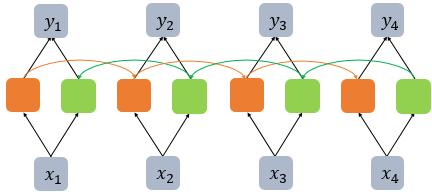

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.

In [21]:
inputs=torch.Tensor(1,10,5)

In [23]:
# bidirectional에 값을 True
cell=nn.RNN(input_size=5,hidden_size=8,num_layers=2,batch_first=True,bidirectional=True)

In [24]:
outputs,_status=cell(inputs)

In [26]:
print(outputs.shape)#배치크기, 시퀀스 길이, 은닉상태의 크기*2

torch.Size([1, 10, 16])


첫번째 리턴값의 크기는 단뱡 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었습니다. 여기서는 (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가집니다. 이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문입니다.

In [27]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])
